In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [3]:
file = '/home/piai/bigdata/data/BigData/IRIS.csv'
df_raw = pd.read_csv(file)
df_raw.shape

(150, 5)

In [4]:
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# # 결측치 제거
# df_raw['JOB'].fillna('Other',inplace = True)
# df_raw.fillna(df_raw.mean(), inplace=True)
# df_raw.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [5]:
# # 범주형 데이터 원핫인코딩 변환
# df_raw_dummy = pd.get_dummies(df_raw)
# df_raw_dummy.shape

(3748, 19)

In [5]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)

df_train_x = df_train.drop('SPECIES',axis=1)
df_train_y = df_train['SPECIES']

df_test_x = df_test.drop('SPECIES',axis=1)
df_test_y = df_test['SPECIES']

In [6]:
print(df_train_x.shape, df_test_x.shape)

(105, 4) (45, 4)


In [8]:
#KNN 모델 생성(default 설정)
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)
#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set:{:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set:0.971
Accuracy on test set:1.000


In [9]:
knn_uncustomized

KNeighborsClassifier()

In [13]:
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
#최대 이웃 수 : 1 ~ 15
para_n_neighbors = [i for i in range(1,30)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

#데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuacy"] = train_accuracy
df_accuracy_neighbors["TestAccuacy"] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuacy,TestAccuacy
0,1,1.000,0.978
1,2,0.971,0.978
2,3,0.962,0.978
3,4,0.952,0.956
4,5,0.971,1.000
5,6,0.962,1.000
6,7,0.971,0.978
7,8,0.971,0.978
8,9,0.981,1.000
9,10,0.981,1.000


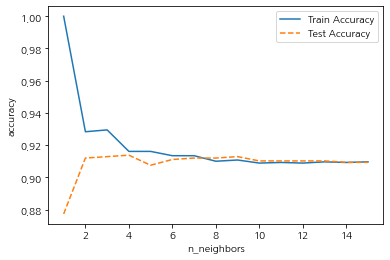

In [11]:
#178
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("n_neighbors")
plt.legend()

n_neighbors = 4

In [13]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy =[]
#이웃 수
para_n_neighbors = [i for i in range(1,11)]*2
#가중치(uniform, distance)
para_weights = (["uniform"]) * 10 + (["distance"] * 10 )
#zip(list1, list2, ...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
#1번 loop: n_neighbors = para_n_neighbors[0], weights =para_weights[0]
#2번 loop: n_neighbors = para_n_neighbors[1], weights =para_weights[1]

for (v_n_neighbors, v_weights) in zip(para_n_neighbors , para_weights):
    knn = KNeighborsClassifier(n_neighbors= v_n_neighbors, weights= v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.877
1,2,uniform,0.928,0.912
2,3,uniform,0.929,0.913
3,4,uniform,0.916,0.914
4,5,uniform,0.916,0.908
5,6,uniform,0.913,0.911
6,7,uniform,0.913,0.912
7,8,uniform,0.910,0.912
8,9,uniform,0.911,0.913
9,10,uniform,0.909,0.910


In [14]:
#그림을 그리기 위해 데이터의 형태를 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors', columns = 'Weights',\
                                                      values = ['TrainAccuracy', 'TestAccuracy'])
df_accuracy_weights_pivot

#pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '_' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.877333,0.877333
2,1.0,0.928326,0.877333,0.912000
3,1.0,0.929470,0.912000,0.912889
4,1.0,0.916127,0.913778,0.913778
5,1.0,0.916127,0.912889,0.907556


In [15]:
## train 및 정확도 결과 저장용
train_accuracy=[];test_accuracy=[]

## 이웃수
para_n_neighbors = [i for i in range(1,11)]*3

## 거리계산 방법 (minkowki,euclidean,manhattan )
para_metric = ["minkowski"]*10 + ["euclidean"]*10 + ["manhattan"]*10

for (v_n_neighbors,v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, metric = v_metric, weights='uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
    
# 데이터 테이블 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.877
1,2,minkowski,0.928,0.912
2,3,minkowski,0.929,0.913
3,4,minkowski,0.916,0.914
4,5,minkowski,0.916,0.908
5,6,minkowski,0.913,0.911
6,7,minkowski,0.913,0.912
7,8,minkowski,0.910,0.912
8,9,minkowski,0.911,0.913
9,10,minkowski,0.909,0.910


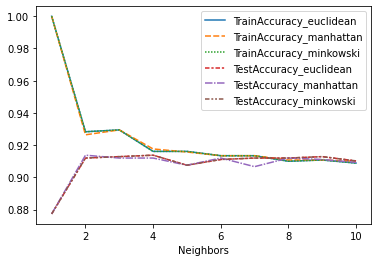

In [ ]:


#정확도 그래프
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index="Neighbors",columns="Metric",
                                                   values=["TrainAccuracy","TestAccuracy"])

level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns=level0+"_"+level1
sns.lineplot(data=df_accuracy_metric_pivot)

In [ ]:
#최종모델
knn_model = KNeighborsClassifier(n_neighbors=4,weights="uniform",metric="euclidean")
knn_model.fit(df_train_x,df_train_y)
#평가
y_pred=knn_model.predict(df_test_x)

#train 데이터 셋 정확도
print("train data accuracy:{0:.3f}".format(knn_model.score(df_train_x,df_train_y)))
#test 데이터 셋 정확도
print("test data accuracy:{0:.3f}".format(knn_model.score(df_test_x,df_test_y)))
#confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

train data accuracy:0.916
test data accuracy:0.914
Confusion matrix:
[[1018    3]
 [  94   10]]
